## Clustering Demonstration
We will use k-means clustering to show how clustering works, though several other clustering methods exist. The key hyper-parameter associated with k-means is the value $k$ which specifies the number of clusters.

In [56]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

#### Simple k-Means Demo
We first generate some data with four known clusters

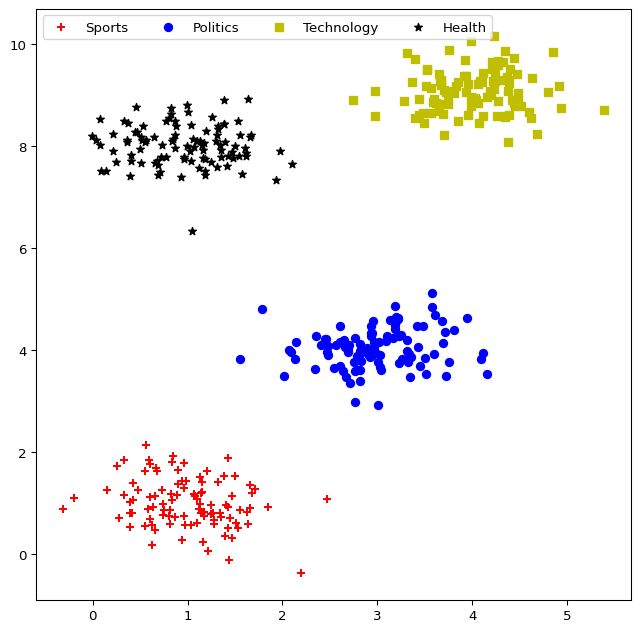

In [66]:
sigma = np.array([[0.2,0],[0,0.2]])
n = 100
mu1 = np.array([1,1])
mu2 = np.array([3,4])
mu3 = np.array([4,9])
mu4 = np.array([1,8])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.zeros([4*n,1])
y[n:2*n] = 1
y[2*n:3*n] = 2
y[3*n:4*n] = 3
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b',marker='o')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='y',marker='s')
plt.scatter(X[np.where(y == 3)[0],0],X[np.where(y == 3)[0],1],c='k',marker='*')

plt.legend(['Sports','Politics','Technology','Health'],ncol=4,loc=2)

Stack all data together and select four random cluster centers

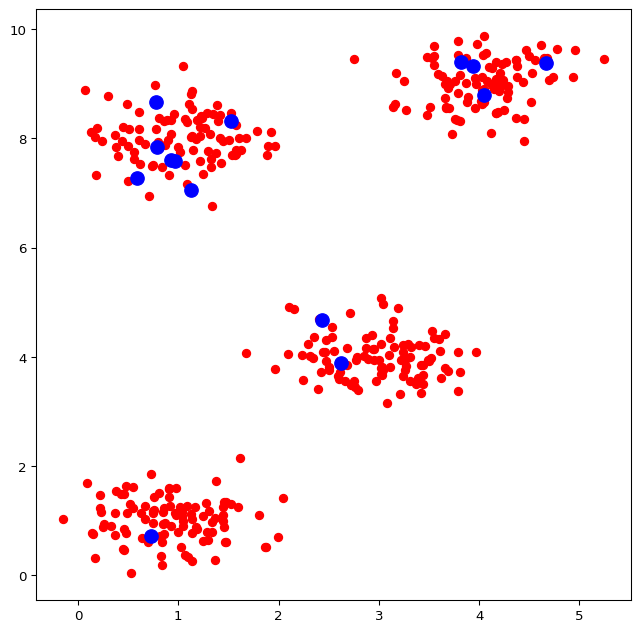

In [58]:
k = 14
r = np.random.permutation(X.shape[0])
init_centroids = X[r[0:k],:]
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c='r')
plt.scatter(init_centroids[:,0],init_centroids[:,1],c='b',marker='o',s=100)


Assign points to the closest cluster and recompute centroids. Iterate until converged. Notice how quickly k-means converges regardless of the initial conditions. However, this might not always be true.

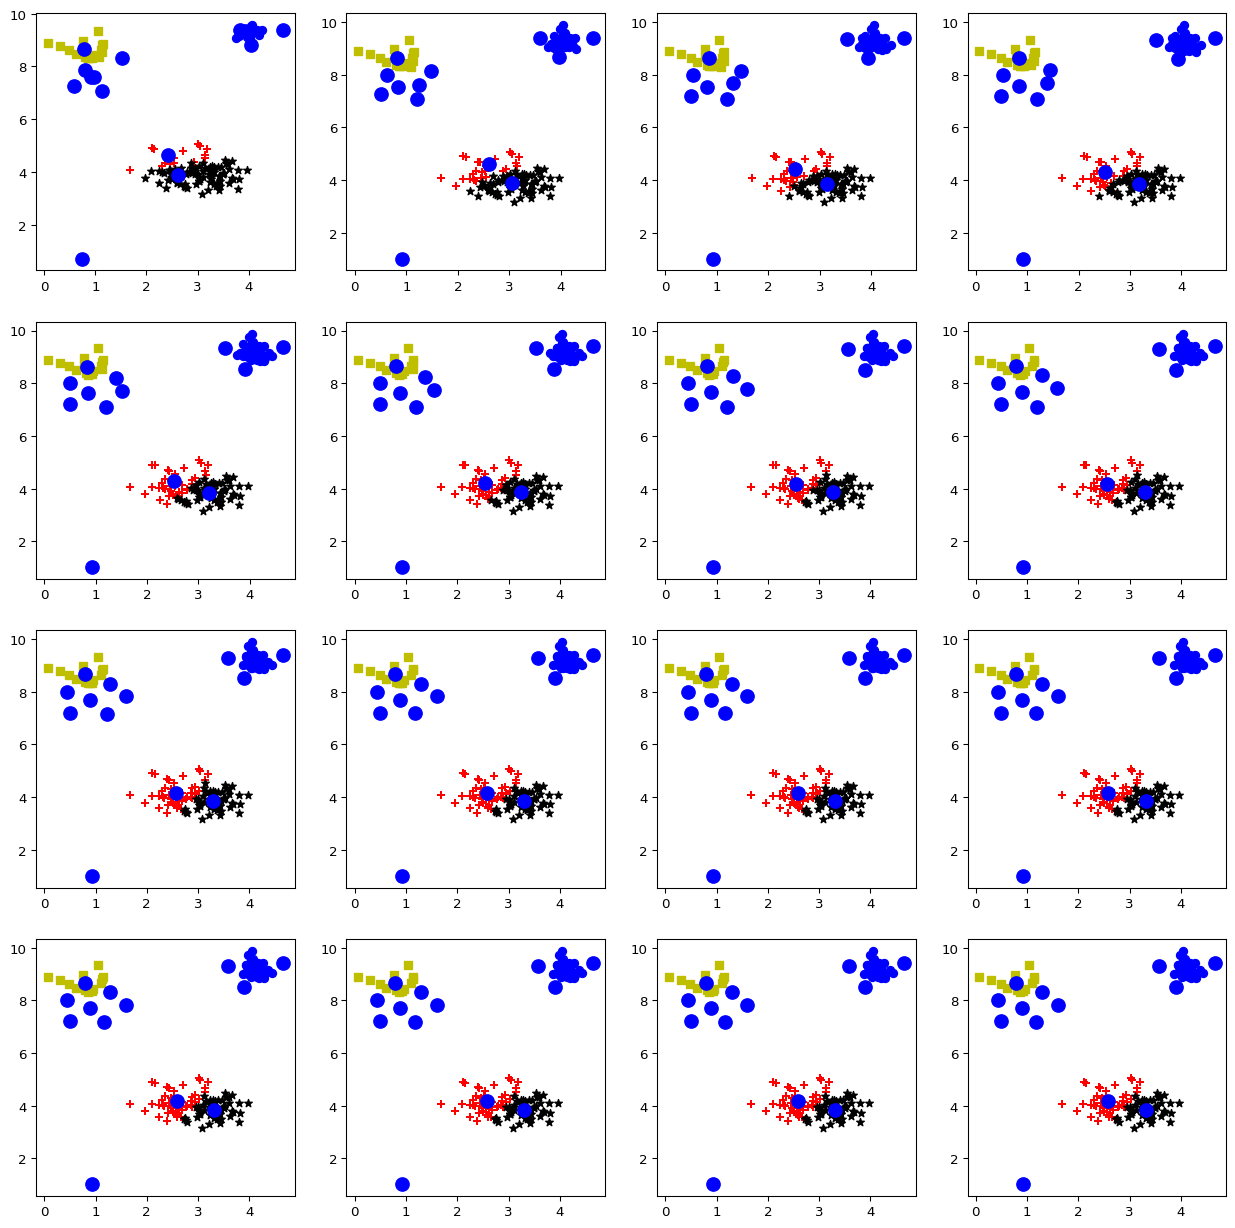

In [59]:
centroids = init_centroids
fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')
for iters in range(16):
    distances = np.zeros((X.shape[0],k))
    for i in range(k):
        for j in range(X.shape[0]):
            distances[j,i] = np.sqrt(np.sum((X[j,:] - centroids[i,:])**2))
    assigned_cluster = np.argmin(distances,axis=1) 
    ax = fig.add_subplot(4,4,iters+1)

    ax.scatter(X[np.where(assigned_cluster == 0)[0],0],X[np.where(assigned_cluster == 0)[0],1],c='r',marker='+')
    ax.scatter(X[np.where(assigned_cluster == 1)[0],0],X[np.where(assigned_cluster == 1)[0],1],c='b',marker='o')
    ax.scatter(X[np.where(assigned_cluster == 2)[0],0],X[np.where(assigned_cluster == 2)[0],1],c='y',marker='s')
    ax.scatter(X[np.where(assigned_cluster == 3)[0],0],X[np.where(assigned_cluster == 3)[0],1],c='k',marker='*')
    ax.scatter(centroids[:,0],centroids[:,1],c='b',marker='o',s=100)

    # recompute centroids
    for i in range(k):
        centroids[i,:] = np.mean(X[np.where(assigned_cluster == i)[0],:],axis=0)

### k-Means on Handwritten Digit Recognition Data
We can use k-means on the handwritten digits data set

In [60]:
mat = loadmat('mnist_all.mat') 
alltraindata = mat.get('train0')
for i in range(1,10):
    m = mat.get('train'+str(i))
    alltraindata = np.vstack((alltraindata,m))
alltraindata = np.array(alltraindata,dtype=float)
X = scale(alltraindata)

In [61]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
s = np.random.permutation(X.shape[0])
kmeans.fit(X[s[0:10000],:])
#kmeans.fit(X)


KMeans(n_clusters=10, n_init=10)

In [62]:
kmeans.labels_.shape

(10000,)

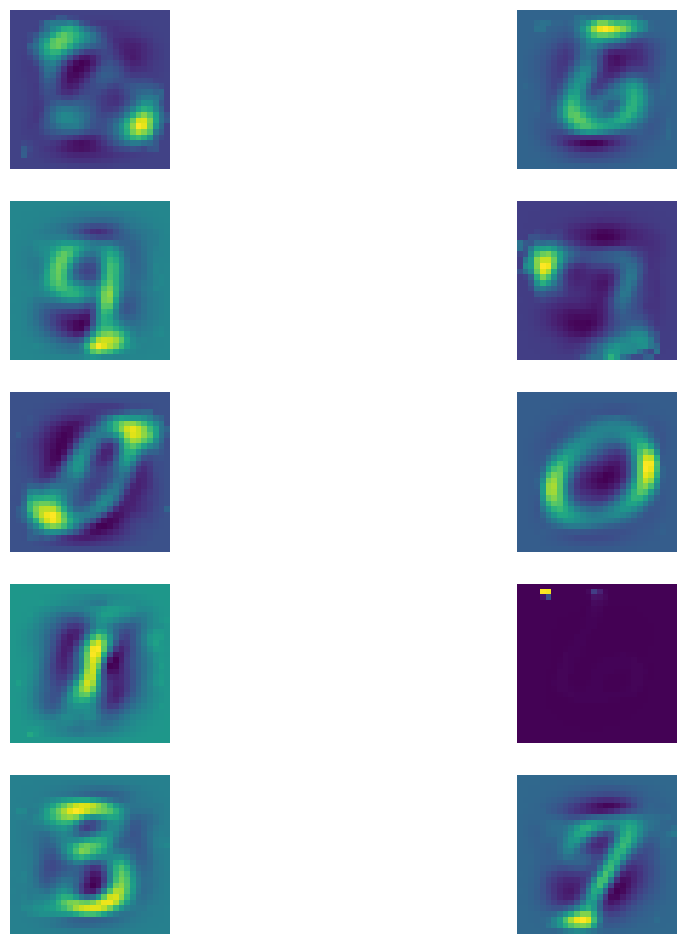

In [63]:
#plot the centroids
fig = plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(5,2,i+1)
    row = kmeans.cluster_centers_[i,:]
    # note that each row is a flattened image
    # we first reshape it to a 28x28 matrix
    plt.imshow(np.reshape(row,((28,28))))
    plt.axis('off')

# Bonus assignment start:

### Generating data into 4 blocks

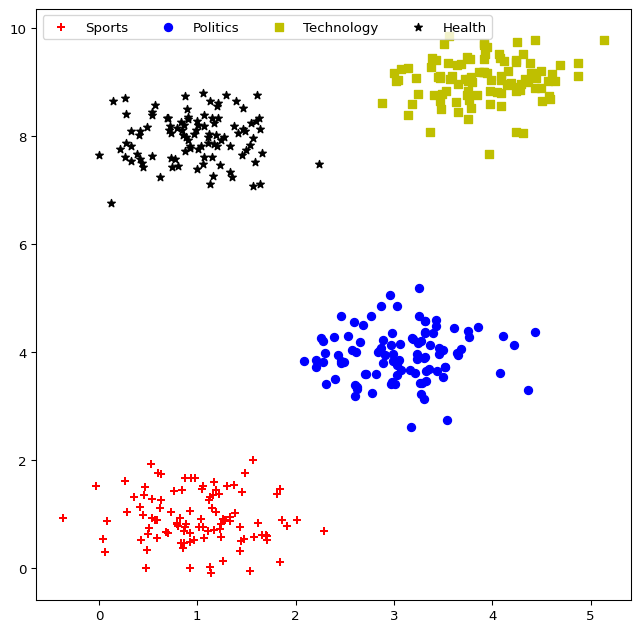

In [112]:
import random
random.seed(10)
sigma = np.array([[0.2,0],[0,0.2]])
n = 100
mu1 = np.array([1,1])
mu2 = np.array([3,4])
mu3 = np.array([4,9])
mu4 = np.array([1,8])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.zeros([4*n,1])
y[n:2*n] = 1
y[2*n:3*n] = 2
y[3*n:4*n] = 3
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b',marker='o')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='y',marker='s')
plt.scatter(X[np.where(y == 3)[0],0],X[np.where(y == 3)[0],1],c='k',marker='*')

plt.legend(['Sports','Politics','Technology','Health'],ncol=4,loc=2)

### First task is to use the same data points and run the provided version of code 10 times for 10 random choices of 4 centroids. 

In [113]:
def orginal_kmeans_random(X, k, max_iters=16, init_centroids=None):
    # If no centroids provided, initialize randomly
    if init_centroids is None:
        # print("Centroids are randomly initialised")
        r = np.random.permutation(X.shape[0])
        init_centroids = X[r[0:k],:]
    centroids = init_centroids.copy()
    all_centroids = [centroids.copy()]
    for iters in range(16):
        distances = np.zeros((X.shape[0],k))
        for i in range(k):
            for j in range(X.shape[0]):
                distances[j,i] = np.sqrt(np.sum((X[j,:] - centroids[i,:])**2))
        assigned_cluster = np.argmin(distances,axis=1) 
    
        # recompute centroids
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            new_centroids[i,:] = np.mean(X[np.where(assigned_cluster == i)[0],:],axis=0)

        all_centroids.append(new_centroids.copy())

        epsilon = 1e-4
        # Check for convergence
        if np.linalg.norm(centroids - new_centroids) < epsilon:
            break
        
        centroids = new_centroids
    
    return iters + 1, all_centroids 

In [114]:
# the number of iterations to converge
random_centroids_iterations = []
k = 4

for i in range(10):
    num_iters, _ = orginal_kmeans_random(X, k)
    random_centroids_iterations.append(num_iters)
    print(f"Run {i+1}: Converged in {num_iters} iterations")

print("Average Iterations (Original Code):", np.mean(original_iterations))

Run 1: Converged in 2 iterations
Run 2: Converged in 5 iterations
Run 3: Converged in 4 iterations
Run 4: Converged in 3 iterations
Run 5: Converged in 7 iterations
Run 6: Converged in 7 iterations
Run 7: Converged in 12 iterations
Run 8: Converged in 5 iterations
Run 9: Converged in 4 iterations
Run 10: Converged in 3 iterations
Average Iterations (Original Code): 12.6


### Task 1:	Choose first centroid randomly, choose second farthest away from first, third farthest away from first and second, and so on.  (2.5 points)

In [115]:
def generating_centroids(X, k):
    # Choose the first centroid randomly
    centroids = [X[np.random.choice(X.shape[0])]]
    for j in range(1, k):
        distances = []
        for x in X:
            dist = []
            for c in centroids:
                dist.append(np.linalg.norm(x - c))
            distances.append(min(dist))
        next_centroid = X[np.argmax(distances)]
        centroids.append(next_centroid)
    return np.array(centroids)

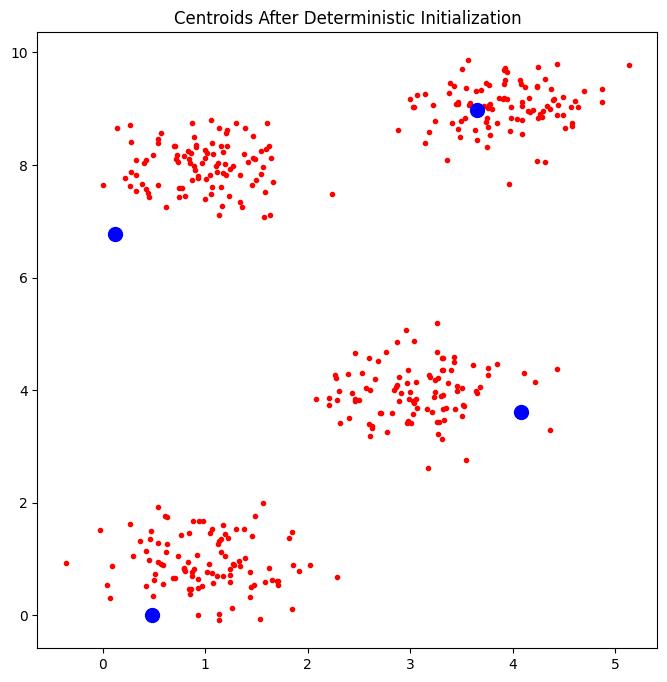

In [116]:
# For visualization
k = 4 
init_centroids = generating_centroids(X, k)

# Visualize the centroids
fig = plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='r', marker='.')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='b', marker='o', s=100)
plt.title("Centroids After Deterministic Initialization")
plt.show()

### 2.	Apply a method to store the initial choice of centroids to ensure that the experiments are reproducible. (2.5 points)

In [117]:
def save_centroids(centroids, filename="initial_centroids.npy"):
    np.save(filename, centroids)

def load_centroids(filename="initial_centroids.npy"):
    centroids = np.load(filename)
    return centroids

In [118]:
modified_iterations = []
k = 4
for i in range(10):
    init_centroids = generating_centroids(X, k)  
    save_centroids(init_centroids)
    loaded_centroids = load_centroids()    
    num_iters, _ = orginal_kmeans_random(X, k, init_centroids=loaded_centroids) 
    modified_iterations.append(num_iters)
    print(f"Modified Run {i+1}: Converged in {num_iters} iterations")

# Display Average Iterations
print("Average Iterations (Modified Code):", np.mean(modified_iterations))

Modified Run 1: Converged in 2 iterations
Modified Run 2: Converged in 2 iterations
Modified Run 3: Converged in 3 iterations
Modified Run 4: Converged in 3 iterations
Modified Run 5: Converged in 3 iterations
Modified Run 6: Converged in 2 iterations
Modified Run 7: Converged in 3 iterations
Modified Run 8: Converged in 2 iterations
Modified Run 9: Converged in 2 iterations
Modified Run 10: Converged in 3 iterations
Average Iterations (Modified Code): 2.5


### Extra : Ploting the centroids in each iteration

In [119]:
# Plot Centroids at Each Iteration
def plot_centroids_in_grid(X, all_centroids, k, num_iters, plots_per_row=4):
    rows = num_iters // plots_per_row + (num_iters % plots_per_row != 0)
    
    fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 4 * rows))
    axes = axes.flatten()

    for idx, centroids in enumerate(all_centroids[:num_iters]):
        ax = axes[idx]
        ax.scatter(X[:, 0], X[:, 1], marker='.', alpha=0.5, label='Data Points')
        
        # Plot Centroid Movements
        for i in range(k):
            ax.scatter(centroids[i, 0], centroids[i, 1], s=150, label=f'Centroid {i+1}')
        
        ax.set_title(f"Iteration {idx+1}")
        ax.legend(loc='lower right')

    for i in range(num_iters, len(axes)):
        fig.delaxes(axes[i])

    plt.show()

Modified Run 1: Converged in 3 iterations


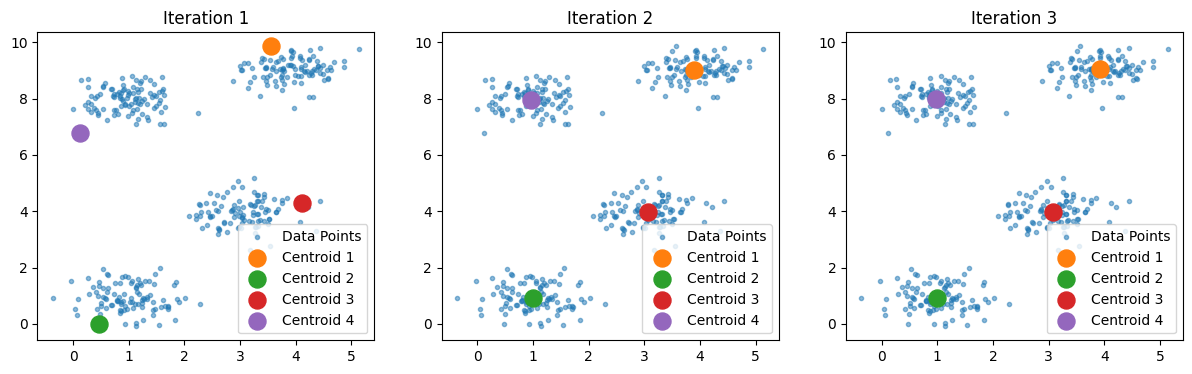

Modified Run 2: Converged in 3 iterations


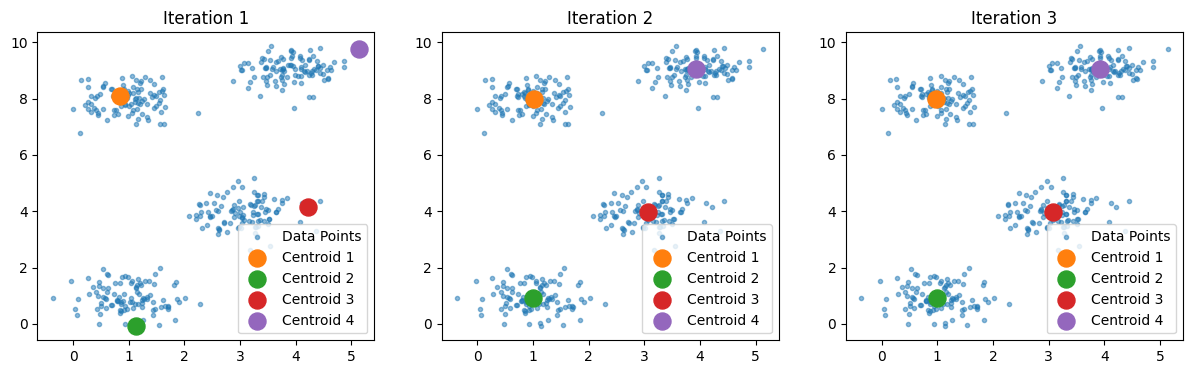

Modified Run 3: Converged in 3 iterations


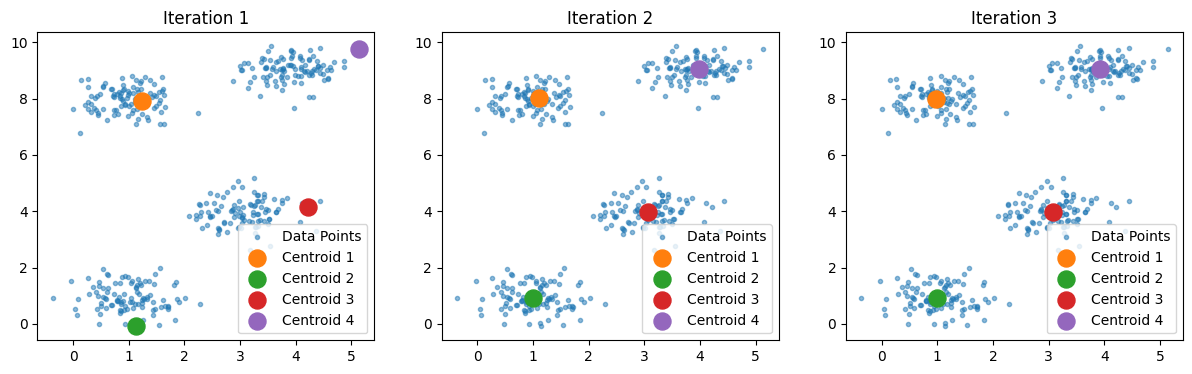

Modified Run 4: Converged in 3 iterations


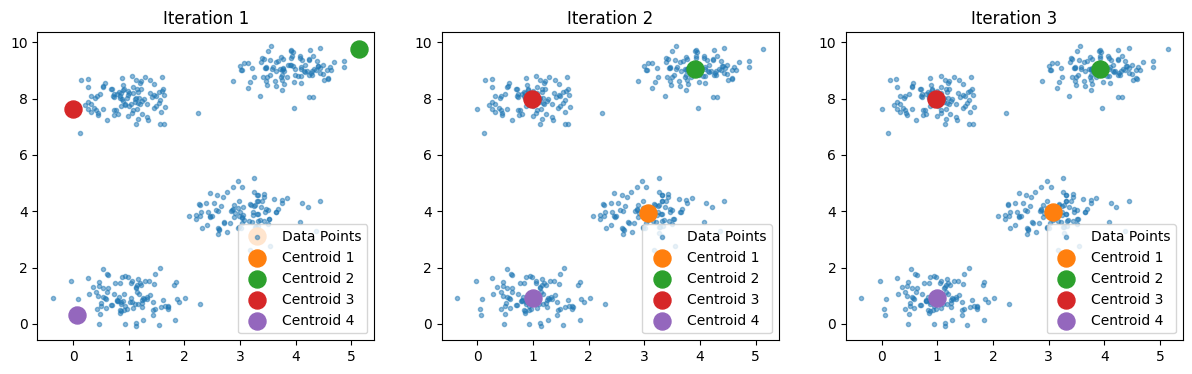

Modified Run 5: Converged in 2 iterations


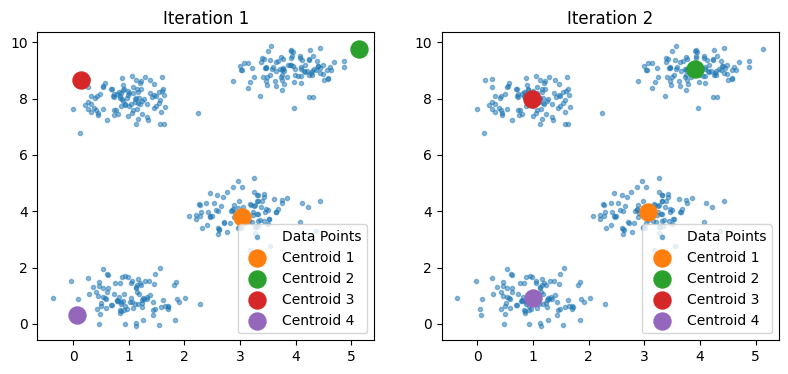

Modified Run 6: Converged in 2 iterations


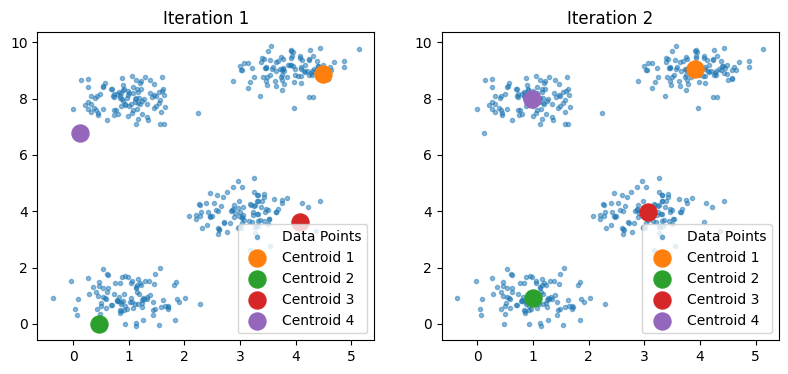

Modified Run 7: Converged in 3 iterations


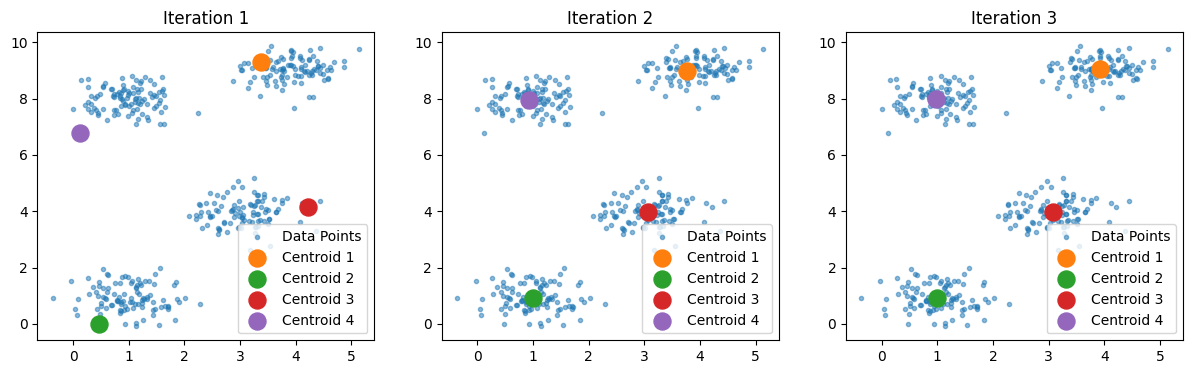

Modified Run 8: Converged in 3 iterations


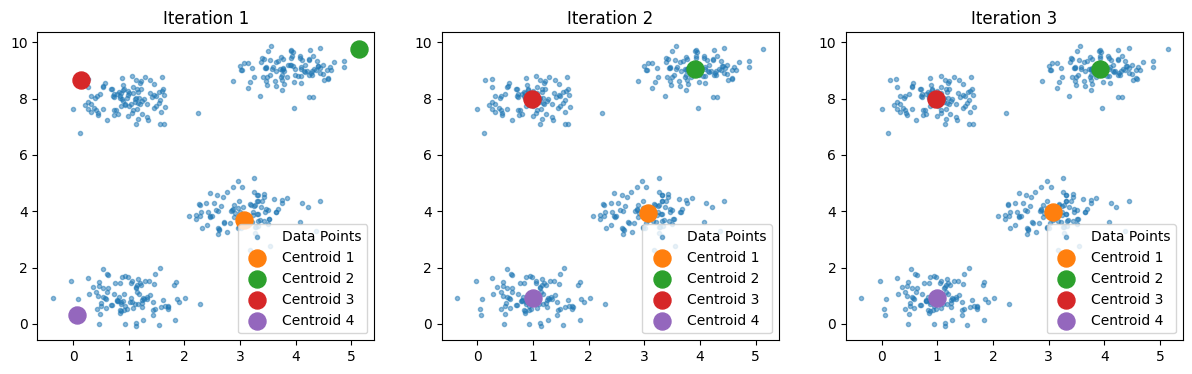

Modified Run 9: Converged in 2 iterations


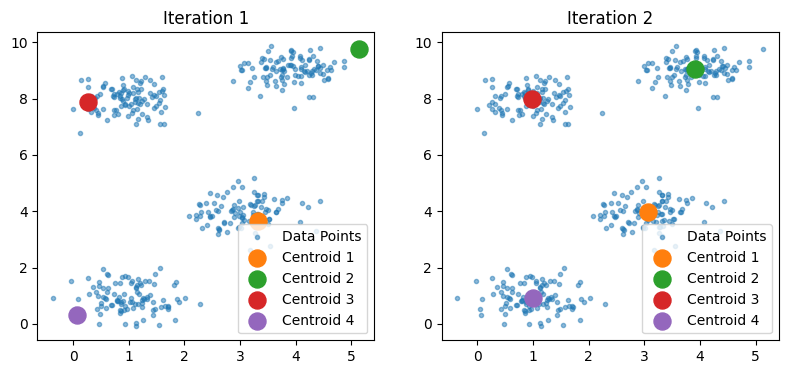

Modified Run 10: Converged in 3 iterations


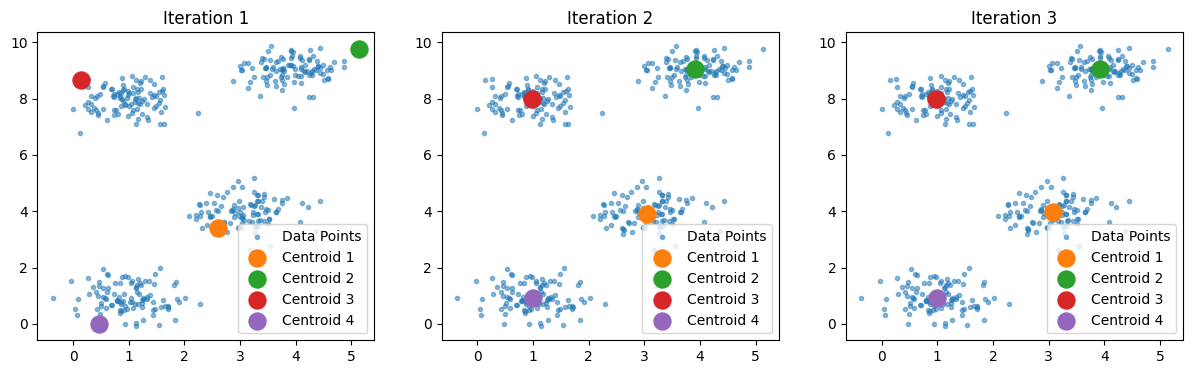

Average Iterations (Modified Code): 2.7


In [120]:
# Running the Modified Code
modified_iterations = []
k = 4

for i in range(10):
    init_centroids = generating_centroids(X, k)  # Deterministic centroids
    save_centroids(init_centroids)  # Save for reproducibility
    
    loaded_centroids = load_centroids()
    num_iters, all_centroids = orginal_kmeans_random(X, k, init_centroids=loaded_centroids)
    modified_iterations.append(num_iters)
    
    if num_iters <= 16:
        print(f"Modified Run {i+1}: Converged in {num_iters} iterations")
        plot_centroids_in_grid(X, all_centroids, k, num_iters)

# Display Average Iterations
print("Average Iterations (Modified Code):", np.mean(modified_iterations))